In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A_1 = np.array([[2, .05],
                [1e-6, -.05]], dtype=np.float64)
A_2 = np.array([[-7, .05],
                [1e-6, -.05]], dtype=np.float64)
number_of_runs = 100

array([[-1.00000000e+00, -7.19405843e-03],
       [ 1.43884892e-07, -9.99974122e-01]])

In [ ]:
def calculate_one_run(A1, A2, tau, L=100, distribution='uniform'):
    D2, V2 = np.linalg.eig(A2)
    expm_20A2 = V2 @ np.diag(np.exp(20 * D2)) @ np.linalg.inv(V2)

    D1, V1 = np.linalg.eig(A1)

    G = np.eye(2, dtype=np.float64)
    
    for _ in range(L):
        if distribution == 'uniform':
            T = np.random.uniform(0, 2 * tau)
        elif distribution == 'delta':
            T = tau
        elif distribution == 'exponential':
            T = np.random.exponential(1 / tau)
        expm_T_A1 = V1 @ np.diag(np.exp(T * D1)) @ np.linalg.inv(V1)
        G = G @ expm_20A2 @ expm_T_A1
    result = np.log(np.trace(G)) / (2 * L)
    return result

Note that $L = 10$ in this run. You can increase it, and see that there will be an overflow.

In [ ]:
from IPython.display import clear_output
taus = np.linspace(1, 20, 10)
distribution_res = dict()
cur_res = 0
distributions = ['exponential', 'uniform', 'delta']
for distr in distributions:
    results = []
    for i, tau in enumerate(taus):
        print(f"Current tau: {tau:.2f}")
        if i % 5 == 0 and i != 0:
            clear_output(wait=True)
        for _ in range(number_of_runs):
            cur_res += calculate_one_run(A_1, A_2, tau, 10)
        results.append(cur_res / number_of_runs)
    distribution_res[distr] = results

In [ ]:
colors = ['red', 'green', 'blue']
for idx, distr in enumerate(distributions):
    plt.plot(taus, distribution_res[distr], color = colors[idx], marker = 'o', label = distr)
plt.legend()
plt.ylabel(r'$\tau \Lambda$')
plt.xlabel(r'$\tau$')
plt.grid()
plt.show()

`mpmath`

## Experiment A

In [ ]:
from mpmath import mp, expm, exp, log, eye, diag, mnorm, mpc, inverse
mp.dps = 50
A_1 = mp.matrix([[2, 0.05],
                 [1e-6, -0.05]])
A_2 = mp.matrix([[-7, 0.05],
                 [1e-6, -0.05]])

number_of_runs = 100

taus = np.linspace(1, 20, 10)
distribution_res = dict()
cur_res = 0
distributions = ['exponential', 'uniform', 'delta']

In [ ]:
def calculate_one_run(A1, A2, tau, L=100, distribution='uniform'):
    D2, V2 = mp.eig(A2)
    expm_20A2 = V2 * diag([exp(20 * d) for d in D2]) * inverse(V2)
    D1, V1 = mp.eig(A1)
    G = eye(2)
    for _ in range(L):
        if distribution == 'uniform':
            T = np.random.uniform(0, 2 * tau)
        elif distribution == 'delta':
            T = tau
        elif distribution == 'exponential':
            T = np.random.exponential(1 / tau)
        expm_T_A1 = V1 * diag([exp(T * d) for d in D1]) * inverse(V1)
        G = G * expm_20A2 * expm_T_A1
    trace_G = sum(G[i, i] for i in range(G.rows))
    result = mp.log(trace_G) / (2 * L)
    return result

In [ ]:
for distr in distributions:
    results = []
    print(f"Running distribution: {distr}")

    for i, tau in enumerate(taus):
        print(f"Current tau: {tau:.2f}")
        if i % 5 == 0 and i != 0:
            clear_output(wait=True)
            print(f"Running distribution: {distr}")
        for _ in range(number_of_runs):
            cur_res += calculate_one_run(A_1, A_2, tau, 100, distribution=distr)
        results.append(cur_res / number_of_runs)
        cur_res = 0
    distribution_res[distr] = results

Running distribution: delta
Current tau: 13.67
Current tau: 15.78
Current tau: 17.89
Current tau: 20.00


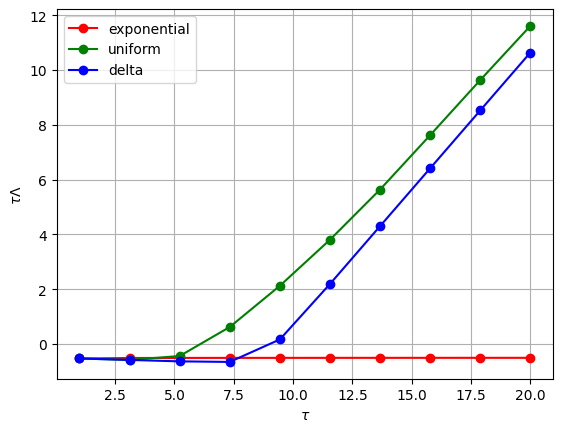

In [ ]:
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']
for idx, distr in enumerate(distributions):
    plt.plot(taus, distribution_res[distr], color = colors[idx], marker = 'o', label = distr)
plt.legend()
plt.ylabel(r'$\tau \Lambda$')
plt.xlabel(r'$\tau$')
plt.grid()
plt.show()

## Experiment B

In [ ]:
A_1 = mp.matrix([[2, 0.05],
                 [1e-6, -0.05]])
A_2 = mp.matrix([[-7, 0.05],
                 [1e-6, -0.05]])

number_of_runs = 100

taus = np.linspace(1, 20, 10)
distribution_res = dict()
cur_res = 0
distributions = ['exponential', 'uniform', 'delta']

In [ ]:
def calculate_one_run(A1, A2, tau, L=100, distribution='uniform'):
    D2, V2 = mp.eig(A2)
    expm_20A2 = V2 * diag([exp(20 * d) for d in D2]) * inverse(V2)
    D1, V1 = mp.eig(A1)
    expm_10A1 = V1 * diag([exp(10 * d) for d in D1]) * inverse(V1)
    G = eye(2)
    for _ in range(L):
        if distribution == 'uniform':
            T = np.random.uniform(0, 2 * tau)
        elif distribution == 'delta':
            T = tau
        elif distribution == 'exponential':
            T = np.random.exponential(1 / tau)
        expm_T_A1 = V1 * diag([exp(T * d) for d in D1]) * inverse(V1)
        G = G * expm_20A2 * expm_T_A1 * expm_10A1
    trace_G = sum(G[i, i] for i in range(G.rows))
    result = mp.log(trace_G) / (2 * L)
    return result

In [ ]:
for distr in distributions:
    results = []
    print(f"Running distribution: {distr}")

    for i, tau in enumerate(taus):
        print(f"Current tau: {tau:.2f}")
        if i % 5 == 0 and i != 0:
            clear_output(wait=True)
            print(f"Running distribution: {distr}")
        for _ in range(number_of_runs):
            cur_res += calculate_one_run(A_1, A_2, tau, 100, distribution=distr)
        results.append(cur_res / number_of_runs)
        cur_res = 0
    distribution_res[distr] = results

Running distribution: delta
Current tau: 13.67
Current tau: 15.78
Current tau: 17.89
Current tau: 20.00


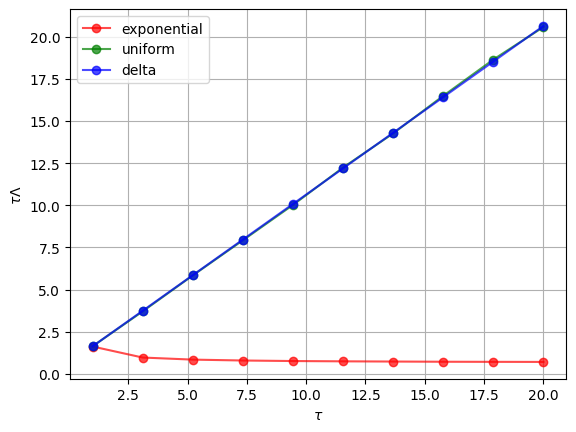

In [ ]:
colors = ['red', 'green', 'blue']
for idx, distr in enumerate(distributions):
    plt.plot(taus, distribution_res[distr], color = colors[idx], marker = 'o', label = distr, alpha = .7)
plt.legend()
plt.ylabel(r'$\tau \Lambda$')
plt.xlabel(r'$\tau$')
plt.grid()
plt.show()